In [1]:
import clifford as cf
import numpy as np 
import matplotlib.pyplot as plt
from clifford import conformalize

#supress warning: 
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

import scipy.constants

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#create a G(R^(2,0))
G20, bladesG20 = cf.Cl(2)
locals().update(bladesG20)   # put all blades into local namespace
# as blades are a dictionary type the blades typed has to be accessed with keys
bladesG20


{'': 1, 'e1': (1^e1), 'e2': (1^e2), 'e12': (1^e12)}

In [3]:
# assign variables to basis blades:
e1 = bladesG20["e1"]
e2 = bladesG20["e2"]
e12 = bladesG20["e12"]


Use the following $\mathbb{R}$-algebra isomorphism: $$G^+(\mathbb{R}^{(2,0)}) \cong G(\mathbb{R}^{(0,1)}) \cong \mathbb{C}$$ to convert complex numbers to spinors (where as spinors we just means G^+ Elements) which are described by the inner direct sum of vectorspaces: $$G^+(\mathbb{R}^{(2,0)}) = G^0(\mathbb{R}^{(2,0)}) \oplus G^2(\mathbb{R}^{(2,0)})$$

In [4]:
def c2s(z):
    '''convert a complex number to a spinor'''
    return z.real + z.imag*e12

def s2c(S):
    '''convert a spinor to a complex number'''
    S0 = float(S(0))
    S2 = float(-S|e12)
    return S0 + S2*1j

In [5]:
#Test the isomorphism: 
s2c(c2s(1+2j)) == 1+2j


True

Now conformalize  $$G(\mathbb{R}^{(2,0)}) \xrightarrow[conformalize]{} G(\mathbb{R}^{(3,1)})$$

In [6]:
G31,bladesG31, conformalstuff = conformalize(G20)

# Put bladesG31 and conformalstuff into local namespace
locals().update(bladesG31)
locals().update(conformalstuff)

bladesG31

{'': 1,
 'e1': (1^e1),
 'e2': (1^e2),
 'e3': (1^e3),
 'e4': (1^e4),
 'e12': (1^e12),
 'e13': (1^e13),
 'e14': (1^e14),
 'e23': (1^e23),
 'e24': (1^e24),
 'e34': (1^e34),
 'e123': (1^e123),
 'e124': (1^e124),
 'e134': (1^e134),
 'e234': (1^e234),
 'e1234': (1^e1234)}

Definition of needed functions: moebius onto smithchart, upprojection as described in notes (all in $\Gamma$-Domain)

In [7]:
# Define needed Möbiustrafo onto smithchart
def moebius(x: complex,y: complex):
    return (x/y-1)/(x/y + 1)


# Define the upprojection from smithchart into conformal space:
def upprojection(x: complex):
    return up(e1*c2s(x))

# Define the downprojection from conformal space onto smith chart:
def downprojection(x):
    return s2c(e1*down(x))

Everything now done are the classical definitions of the transmission line (out of 'Fundamentals of Applied Electromagnetics)

# Define needed physical parameters for the RG59 Coaxial Line

!Remark, all given parameters are given in coordinate d $\in [0,l]$ 

In [8]:
#physical parameters (per meter units for transmission line parameters R,G,L,C)

# values for the radii of the cable
a = 0.292e-3
b = 1.855e-3

# conductor values (copper)
mu_c = 1 * scipy.constants.mu_0 
sigma_c = 5.8e7

# insulator / spacer values
epsilon_r = 2.25
epsilon_0 = scipy.constants.epsilon_0
epsilon = epsilon_r*epsilon_0
mu_r = 1
mu = scipy.constants.mu_0 * mu_r #often the same 
sigma = 5.9e-5

# cable length
l=100

# Calculations for Transmission line parameters according to Coaxial cable geometry

def R(omega):
    R_s = np.sqrt(np.pi*omega/(np.pi*2) * mu_c/sigma_c)
    return 1/(np.pi * 2)*R_s*(1/a + 1/b)

L = mu/(2*np.pi) * np.log(b/a)
G = 2*np.pi * sigma/(np.log(b/a))
C = epsilon*2*np.pi/(np.log(b/a))


# Loadimpedance (vary for different plots)
Z_L = 74


L' = 3.697772347559485e-07
C'= 6.770191322818473e-11
G'= 0.00020050338337895013


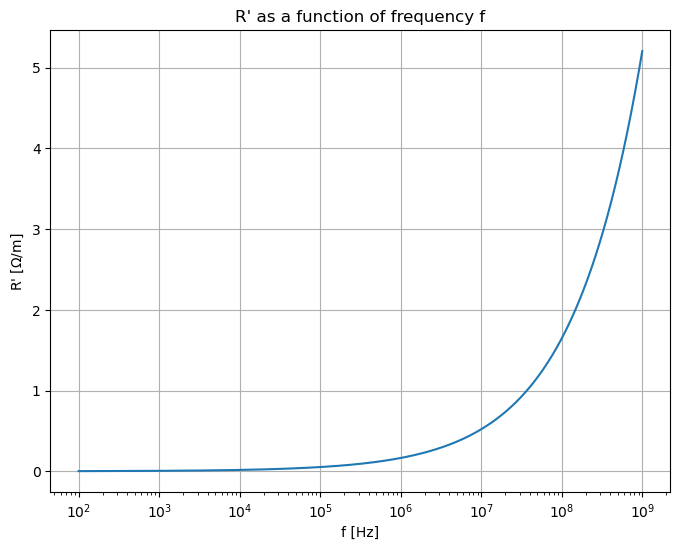

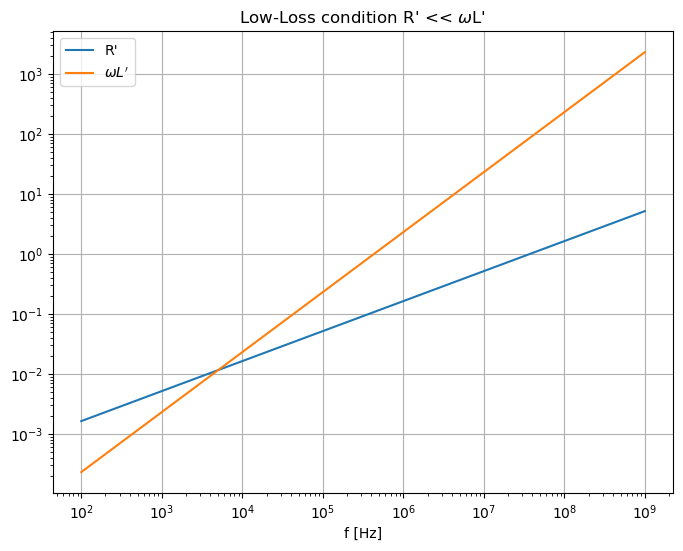

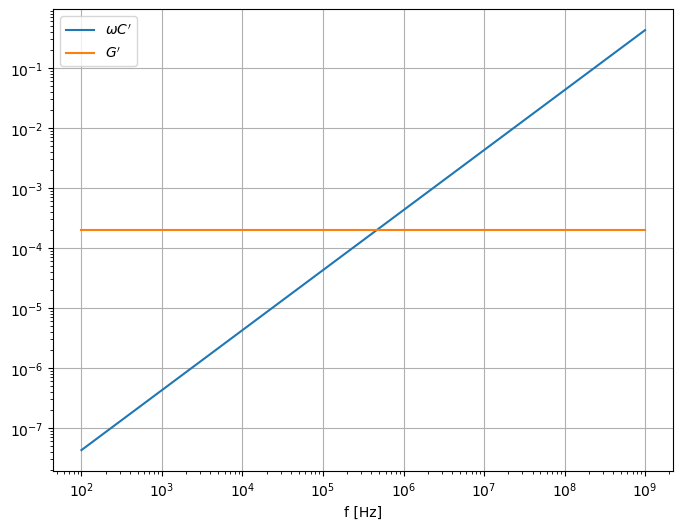

In [9]:
# Plots for behaviour of Transmission line parameters (not necessary)
print("L' =",L)
print("C'=",C)
print("G'=",G)

# calculate frequency values for the distributed resistance and 
frequency = 2*np.pi * np.logspace(2,9,1000)
frequency_test = 1/(2*np.pi)*frequency


# resistance plot
fig_resistance = plt.figure(figsize=(8,6))
plt.plot(frequency_test,R(frequency))
plt.xscale("log")
plt.grid(True)
plt.title("R' as a function of frequency f")
plt.xlabel("f [Hz]")
plt.ylabel("R' [$\Omega$/m]")
plt.show()


# Lowloss plots to verify physical behavior of RG59 cable 
low_lowcondition = frequency*L

fig_lowlosscondition = plt.figure(figsize=(8,6))
plt.plot(frequency_test,R(frequency), label = "R'")
plt.plot(frequency_test,low_lowcondition, label="$\omega L'$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title("Low-Loss condition R' << $\omega$L' ")
plt.xlabel("f [Hz]")
plt.show()

low_lowcondition2 = frequency*C
h_array = np.ones(len(low_lowcondition2))
G_low = h_array*G

frequency2 = 2*np.pi * np.logspace(2,4,1000)
frequency_test2 = 1/(2*np.pi)*frequency
low_lowcondition = frequency*L


fig_lowlosscondition2 = plt.figure(figsize=(8,6))
plt.plot(frequency_test2,low_lowcondition2, label = "$\omega C'$")
plt.plot(frequency_test2,G_low, label="$ G'$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.xlabel("f [Hz]")
plt.show()

# Compute the characteristic parameters for transmission line $\gamma$ and $Z_0$

In [10]:
# Define functions for the propagation constant and the characteristic impedance
def prop_const(omega):
    return np.sqrt((R(omega) + 1j * omega * L) * (G + 1j * omega * C))

def Z0(omega):
    return (R(omega)+1j*omega*L)/prop_const(omega)


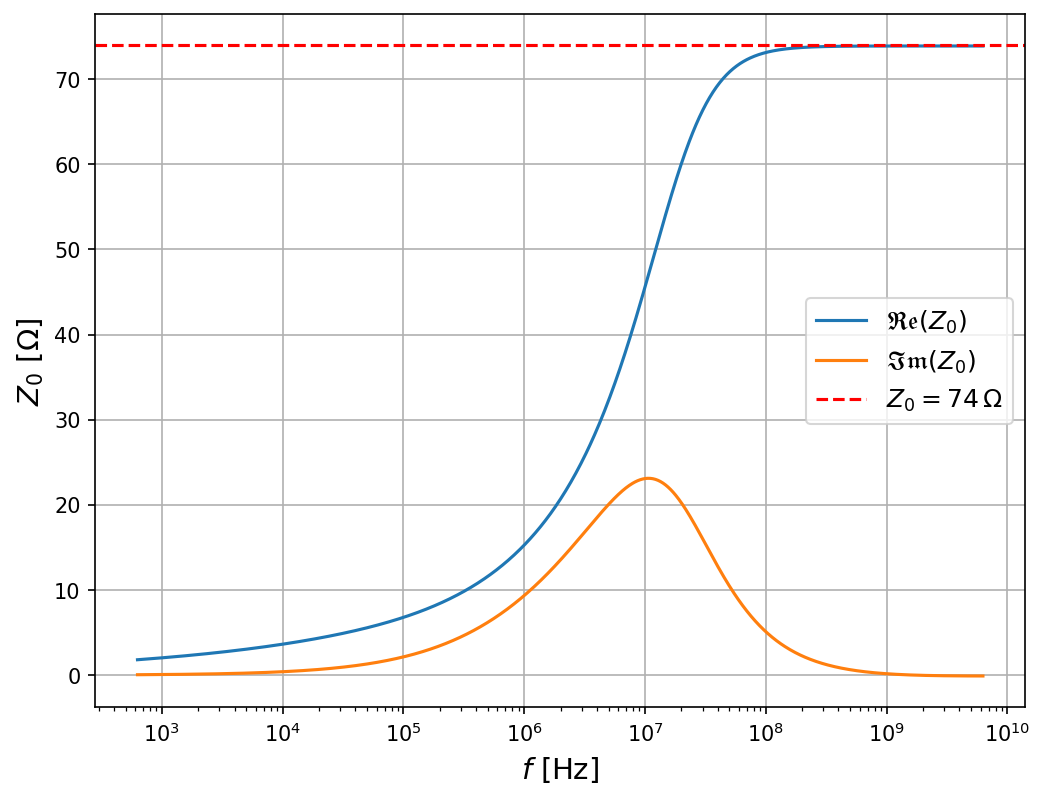

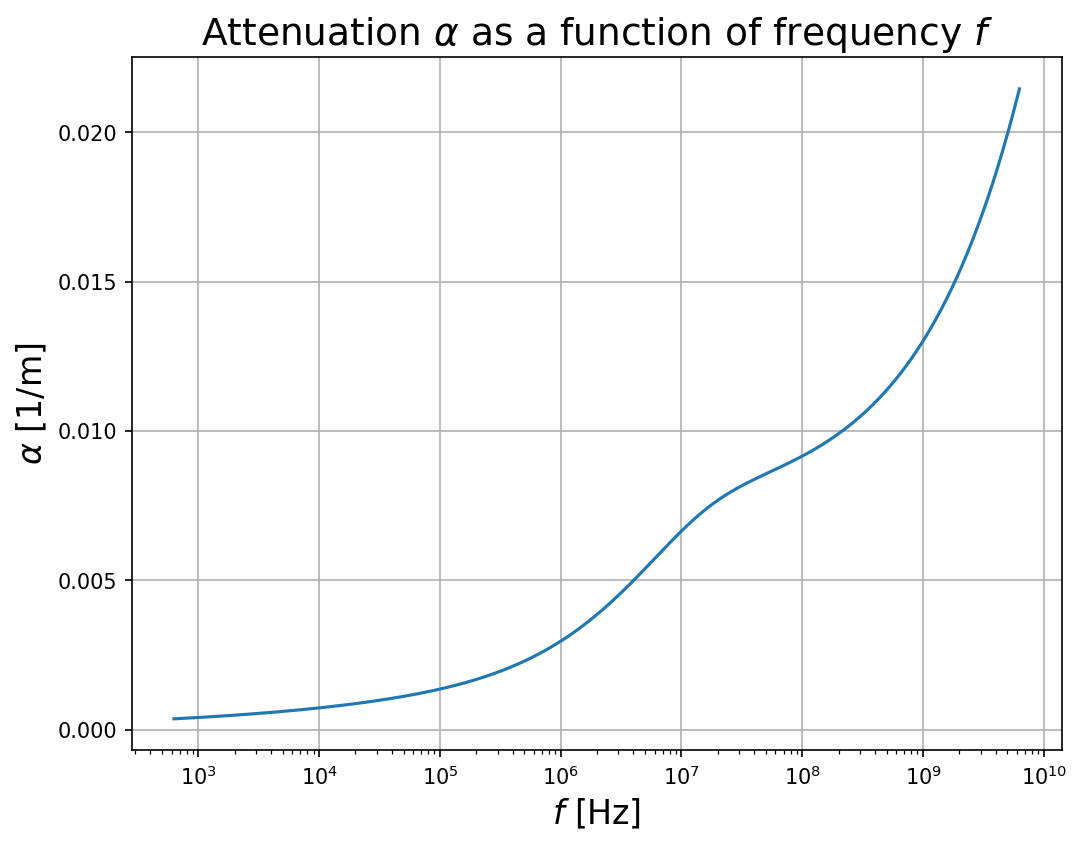

In [11]:
# characteristic impedance plot
fig_Z0 = plt.figure(figsize=(8, 6), dpi=150)
plt.plot(frequency, Z0(frequency_test).real, label="$\mathfrak{Re}(Z_0)$")
plt.plot(frequency, Z0(frequency_test).imag, label="$\mathfrak{Im}(Z_0)$")
plt.axhline(74, color='red', linestyle='--', label='$Z_0 = 74 \, \Omega$')  # horizontal line for 74 ohm
plt.xscale("log")
plt.grid(True)
plt.xlabel("$f$ [Hz]", fontsize=14)
plt.ylabel("$Z_0$ [$\Omega$]", fontsize=14)
plt.legend(fontsize=12)
plt.show()


# attenuatoin parameter alpha plot
fig_attenuation = plt.figure(figsize=(8,6), dpi = 150)
plt.plot(frequency,prop_const(frequency_test).real)
plt.xscale("log") 
plt.grid(True)
plt.title("Attenuation $\\alpha$ as a function of frequency $f$", fontsize=18)
plt.xlabel("$f$ [Hz]", fontsize=16)
plt.ylabel("$\\alpha$ [1/m]", fontsize=16)
plt.show()


It can indeed be observed that in the range of approximately 100 MHz, it can be assumed that the characteristic impedance stabilizes at around 75 Ω.



In [12]:
from numpy import e

helperT =lambda a: e**(-1/2^a*einf)
T = lambda r:  helperT(e1*c2s(r))
RotSZ = e**(np.pi/4^e1*e3)
RotZY = e**(np.pi/2^e2*e3)
RotSY = RotSZ*RotZY
S = lambda z: RotSZ * up(e1*c2s(z)) * ~RotSZ
S2 = lambda z: RotSY * up(e1*c2s(z)) * ~RotSY
T_S = lambda r: RotSZ *  T(r) * ~RotSZ #Rotor for adding impedance
T_S2 = lambda r: RotSY * T(r) * ~RotSY #Rotor for adding admittance


# Define function for wave impedance $Z_{in}(d,\omega)$ along the line

In [13]:
def Z(d,omega):
    alpha = Z_L + Z0(omega) * np.tanh(prop_const(omega)*d)
    beta = Z0(omega) + Z_L * np.tanh(prop_const(omega)*d)
    return Z0(omega) * alpha/beta


# Define the expression for a lossy Transmisison line in classical way and test calculations

In [14]:
# define classical reflection coefficient 
def gamma_normal(d,omega):
    gamma_l = (Z_L - Z0(omega))/(Z_L+Z0(omega))
    return gamma_l * np.exp(-2*prop_const(omega)*d)


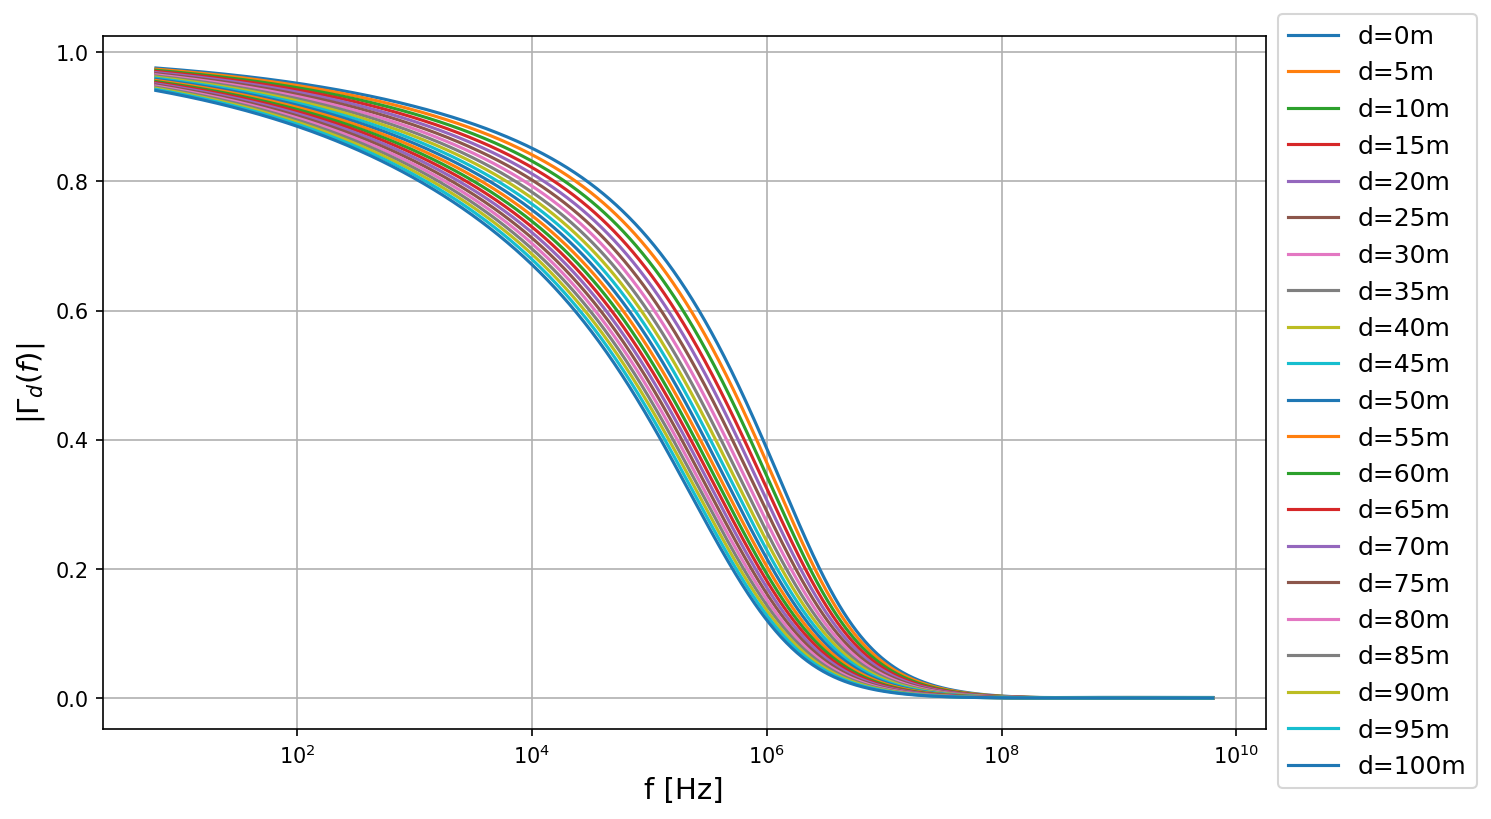

In [15]:
# test frequency
f = 2 * np.pi * np.logspace(0,9,1000)  #Frequenz 
f_test = 1/(2*np.pi) *f



# increments of distance
steps = 5 # adjust to wanted value
# calculation for every distance step d
distances = np.arange(0, l + steps, steps)  
reflections_dict = {} 

for d in distances:
    reflections_dict[d] = gamma_normal(d, f)  
# plot 

fig_normal_gamma_d = plt.figure(figsize=(10, 6), dpi=150)
for d, reflections in reflections_dict.items():
    plt.plot(f, np.abs(reflections), label=f"d={d}m")
plt.xlabel('f [Hz]', fontsize=14)
plt.ylabel('$|\Gamma_d(f)|$', fontsize=14)
plt.xscale("log")
plt.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.0, 1.05))  
plt.grid(True)
plt.show()


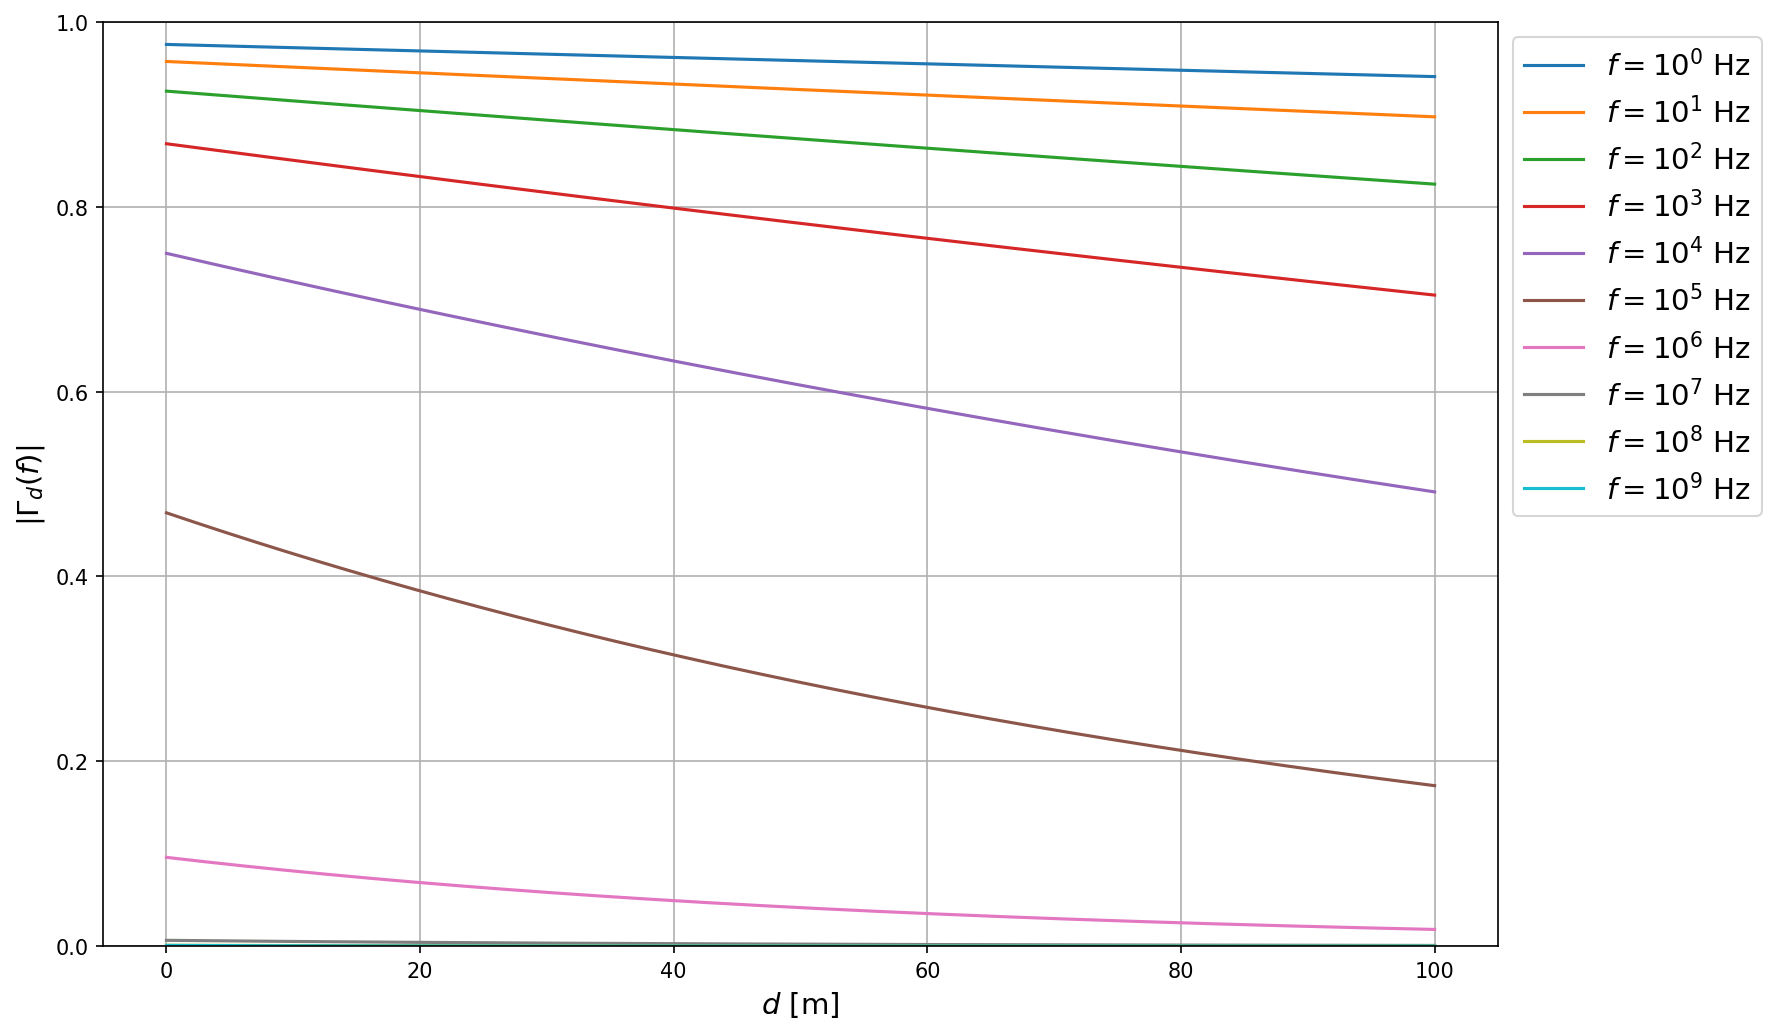

In [16]:
# define parameters for frequency range (exponentials)
f_min = 0
f_max = 10


# initiaize frequency range
frequencies = [10**i for i in range(10)] 
angular_frequencies = [2 * np.pi * f for f in frequencies]  

# initalize values for d along the line
d = np.linspace(0, 100, 10000)

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# calculate reflections coefficients
for i, w in enumerate(angular_frequencies):
    reflections_normal = gamma_normal(d, w)

    # plot
    ax.plot(d, np.abs(reflections_normal), linestyle="-", label=f"$f = 10^{i}$ Hz")


ax.set_xlabel('$d$ [m]', fontsize=14)
ax.set_ylabel('$|\Gamma_d(f)|$', fontsize=14)
ax.legend(fontsize=14, loc="upper left", bbox_to_anchor=(1.0, 1) )
ax.grid(True)
ax.set_ylim(0, 1)
plt.show()


# Define $\Gamma^{CGA}(d,omega)$ in GA

In [17]:
# gamma cga function for creating the plots, if adding impedance is wanted change Z_L above the value, if adding admittance use the commented function instead of the first



# gamma_cga function for adding impedance 
def gamma_cga(d,omega):
    Z_L_old = 74
    difference = abs(Z_L_old - Z_L)
    Rotator = e**(np.pi/4 * e13)
    x = upprojection(Z_L_old/Z0(omega))
    gamma = prop_const(omega)
    alpha = np.real(gamma)
    beta = np.imag(gamma)
    D = lambda alpha: e**((alpha*d)*(E0))
    P = lambda beta: e**(beta*d*e12)
    T_S = lambda r: RotSZ *  T(r) * ~RotSZ
    return D(alpha) * P(beta) * T_S(difference/Z0(omega))* Rotator * x * ~Rotator*~T_S(difference/Z0(omega)) * ~P(beta) * ~D(alpha)

'''
# gamma_cga function for adding admittance
def gamma_cga(d,omega):
    Rotator = e**(np.pi/4 * e13)
    admittance = 50
    x = upprojection(Z_L/Z0(omega))
    gamma = prop_const(omega)
    alpha = np.real(gamma)
    beta = np.imag(gamma)
    D = lambda alpha: e**((alpha*d)*(E0))
    P = lambda beta: e**(beta*d*e12)
    T_S = lambda r: RotSZ *  T(r) * ~RotSZ
    return D(alpha) * P(beta) * T_S2(50/Z0(omega))* Rotator * x * ~Rotator*~T_S2(50/Z0(omega)) * ~P(beta) * ~D(alpha)
'''


'\n# gamma_cga function for adding admittance\ndef gamma_cga(d,omega):\n    Rotator = e**(np.pi/4 * e13)\n    admittance = 50\n    x = upprojection(Z_L/Z0(omega))\n    gamma = prop_const(omega)\n    alpha = np.real(gamma)\n    beta = np.imag(gamma)\n    D = lambda alpha: e**((alpha*d)*(E0))\n    P = lambda beta: e**(beta*d*e12)\n    T_S = lambda r: RotSZ *  T(r) * ~RotSZ\n    return D(alpha) * P(beta) * T_S2(50/Z0(omega))* Rotator * x * ~Rotator*~T_S2(50/Z0(omega)) * ~P(beta) * ~D(alpha)\n'

Reflexionsberechnungen haben gestartet: 19:39:39
Berechnung für Abstand d=0: 19:39:39
Berechnung für Abstand d=5: 19:39:40
Berechnung für Abstand d=10: 19:39:40
Berechnung für Abstand d=15: 19:39:40
Berechnung für Abstand d=20: 19:39:41
Berechnung für Abstand d=25: 19:39:41
Berechnung für Abstand d=30: 19:39:41
Berechnung für Abstand d=35: 19:39:42
Berechnung für Abstand d=40: 19:39:42
Berechnung für Abstand d=45: 19:39:42
Berechnung für Abstand d=50: 19:39:42
Berechnung für Abstand d=55: 19:39:43
Berechnung für Abstand d=60: 19:39:43
Berechnung für Abstand d=65: 19:39:43
Berechnung für Abstand d=70: 19:39:44
Berechnung für Abstand d=75: 19:39:44
Berechnung für Abstand d=80: 19:39:44
Berechnung für Abstand d=85: 19:39:45
Berechnung für Abstand d=90: 19:39:45
Berechnung für Abstand d=95: 19:39:45
Berechnung für Abstand d=100: 19:39:46
Reflexionsberechnungen abgeschlossen: 19:39:46


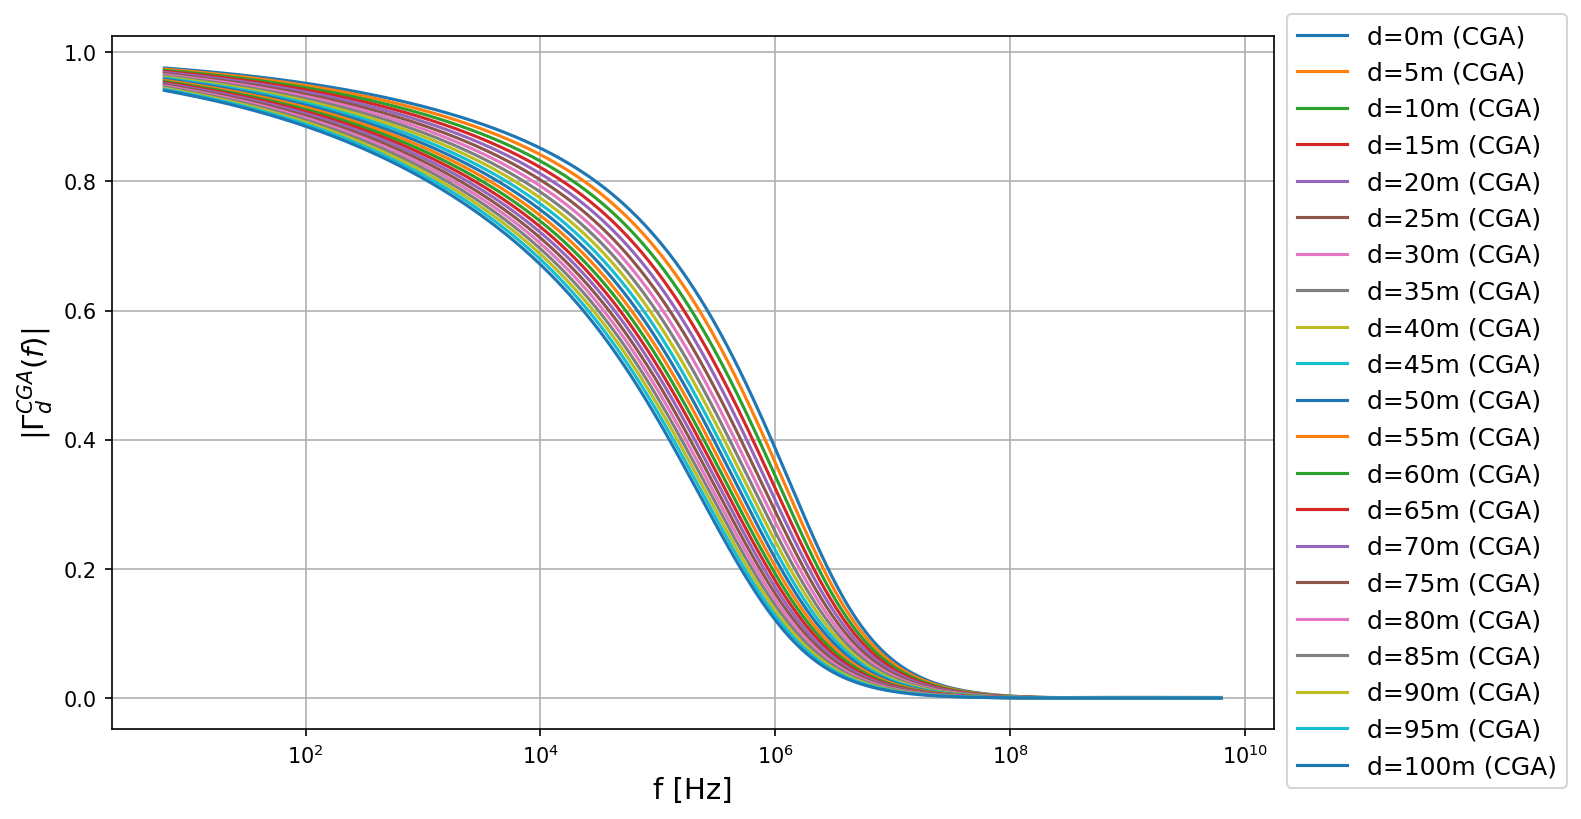

In [18]:
import time

def log_time(message):
    print(f"{message}: {time.strftime('%H:%M:%S', time.localtime())}")
# initialize step size again
steps = 5 

distances = np.arange(0, l + steps, steps)  
values_dict = {} 

log_time("Reflexionsberechnungen haben gestartet")

for d in distances:
    log_time(f"Berechnung für Abstand d={d}")
    reflection = gamma_cga(d, f) 
    projected_values = []

    # down project
    for i in reflection:
        projected_values.append(downprojection(i)) 
    
    # compute reflection coefficient absolut values
    values_dict[d] = np.abs(np.array(projected_values))

log_time("Reflexionsberechnungen abgeschlossen")


fig_gamma_cga_f = plt.figure(figsize=(10, 6), dpi=150)
for d, values in values_dict.items():
    plt.plot(f, values, label=f"d={d}m (CGA)")
plt.xlabel('f [Hz]', fontsize=14)  
plt.ylabel('$|\Gamma^{CGA}_d(f)|$', fontsize=14) 
plt.xscale("log") 
plt.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.grid(True)
plt.show()


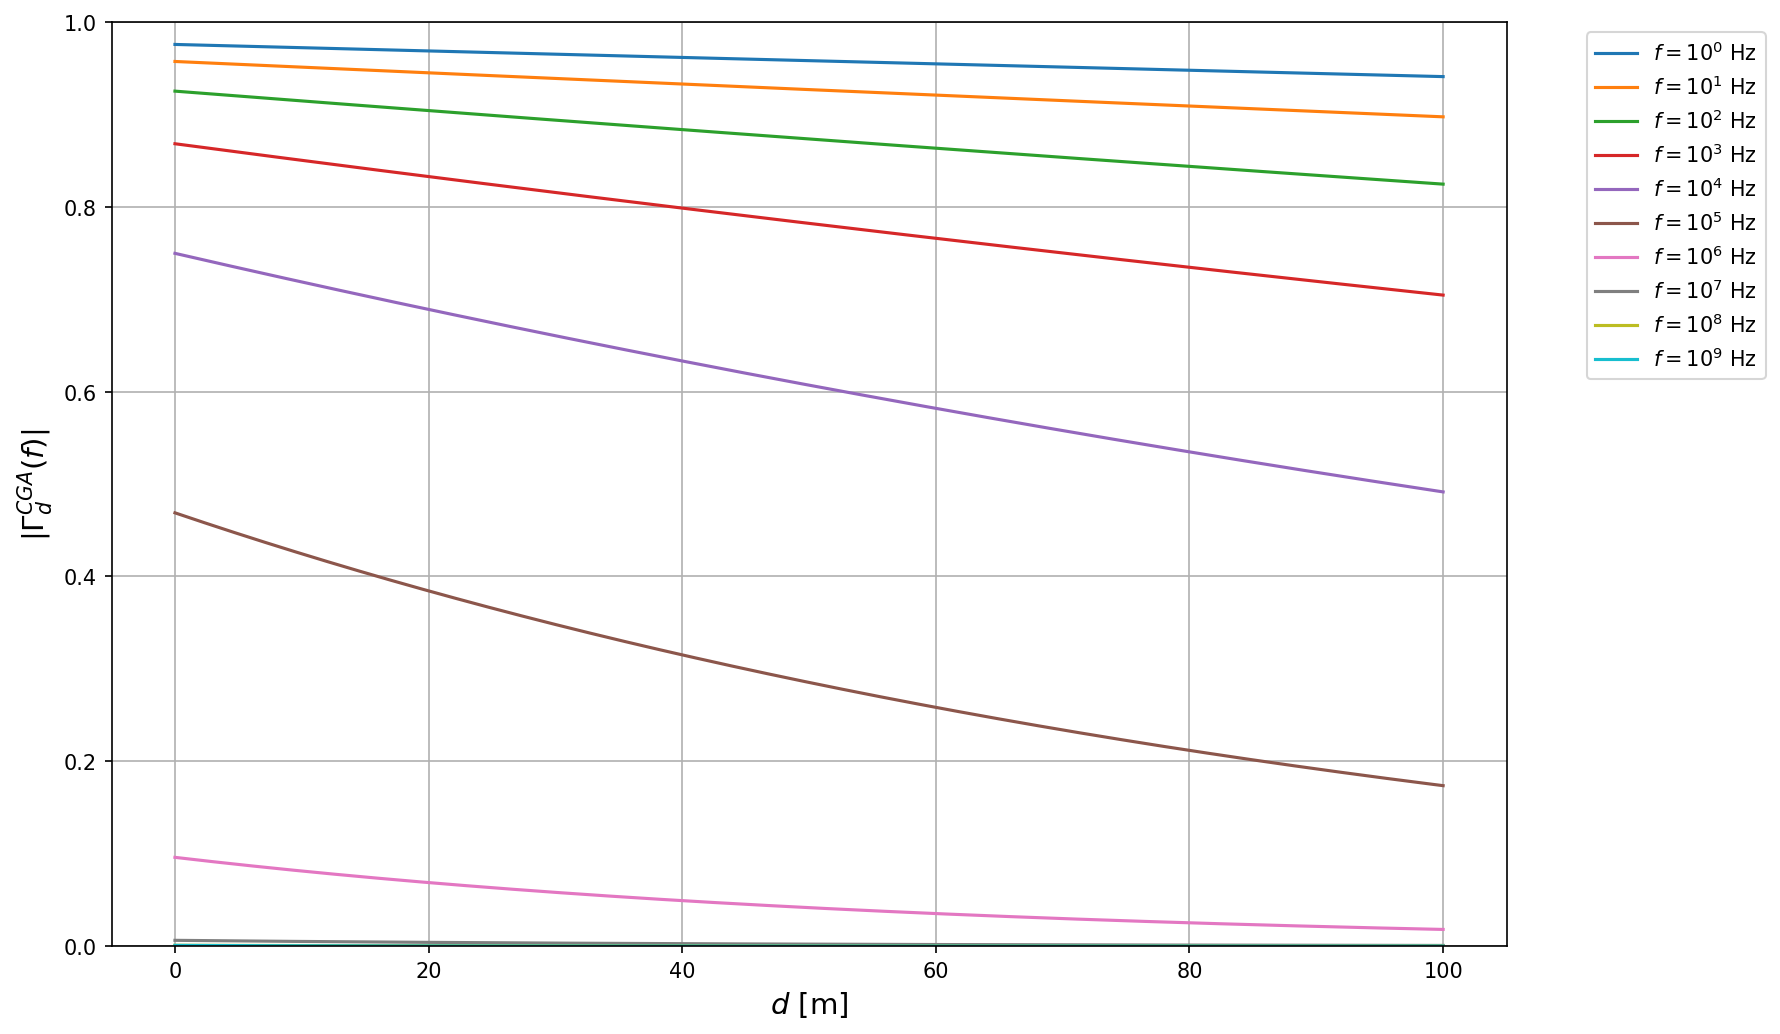

In [19]:
# define parameters for frequency range (exponentials)
f_min = 0
f_max = 10


# initiaize frequency range
frequencies = [10**i for i in range(10)] 
angular_frequencies = [2 * np.pi * f for f in frequencies]  

# initalize values for d along the line
d = np.linspace(0, 100, 10000)

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# calculate values for reflection coefficient
for i, w in enumerate(angular_frequencies):
    reflections_cga = gamma_cga(d, w)
    
    # downprojection
    reflections_projected = [np.abs(downprojection(gamma)) for gamma in reflections_cga]
    
    # plot
    label = f"$f = 10^{i}$ Hz"  
    ax.plot(d, reflections_projected, label=label)


ax.set_xlabel('$d$ [m]', fontsize=14)
ax.set_ylabel('$|\Gamma^{CGA}_d(f)|$', fontsize=14)
ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1) )
ax.grid(True)
ax.set_ylim(0, 1)
plt.show()


Define the superposition plots

/var/folders/nm/73z81_050wz0lqfm_3mplt8h0000gn/T/ipykernel_122/3051203571.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20")


CGA-Reflexionsberechnungen gestartet: 19:40:04
CGA: Berechnung für Abstand d=0: 19:40:04
CGA: Berechnung für Abstand d=5: 19:40:04
CGA: Berechnung für Abstand d=10: 19:40:05
CGA: Berechnung für Abstand d=15: 19:40:05
CGA: Berechnung für Abstand d=20: 19:40:05
CGA: Berechnung für Abstand d=25: 19:40:05
CGA: Berechnung für Abstand d=30: 19:40:06
CGA: Berechnung für Abstand d=35: 19:40:06
CGA: Berechnung für Abstand d=40: 19:40:06
CGA: Berechnung für Abstand d=45: 19:40:07
CGA: Berechnung für Abstand d=50: 19:40:07
CGA: Berechnung für Abstand d=55: 19:40:07
CGA: Berechnung für Abstand d=60: 19:40:07
CGA: Berechnung für Abstand d=65: 19:40:08
CGA: Berechnung für Abstand d=70: 19:40:08
CGA: Berechnung für Abstand d=75: 19:40:08
CGA: Berechnung für Abstand d=80: 19:40:09
CGA: Berechnung für Abstand d=85: 19:40:09
CGA: Berechnung für Abstand d=90: 19:40:09
CGA: Berechnung für Abstand d=95: 19:40:09
CGA: Berechnung für Abstand d=100: 19:40:10
CGA-Reflexionsberechnungen abgeschlossen: 19:40:10


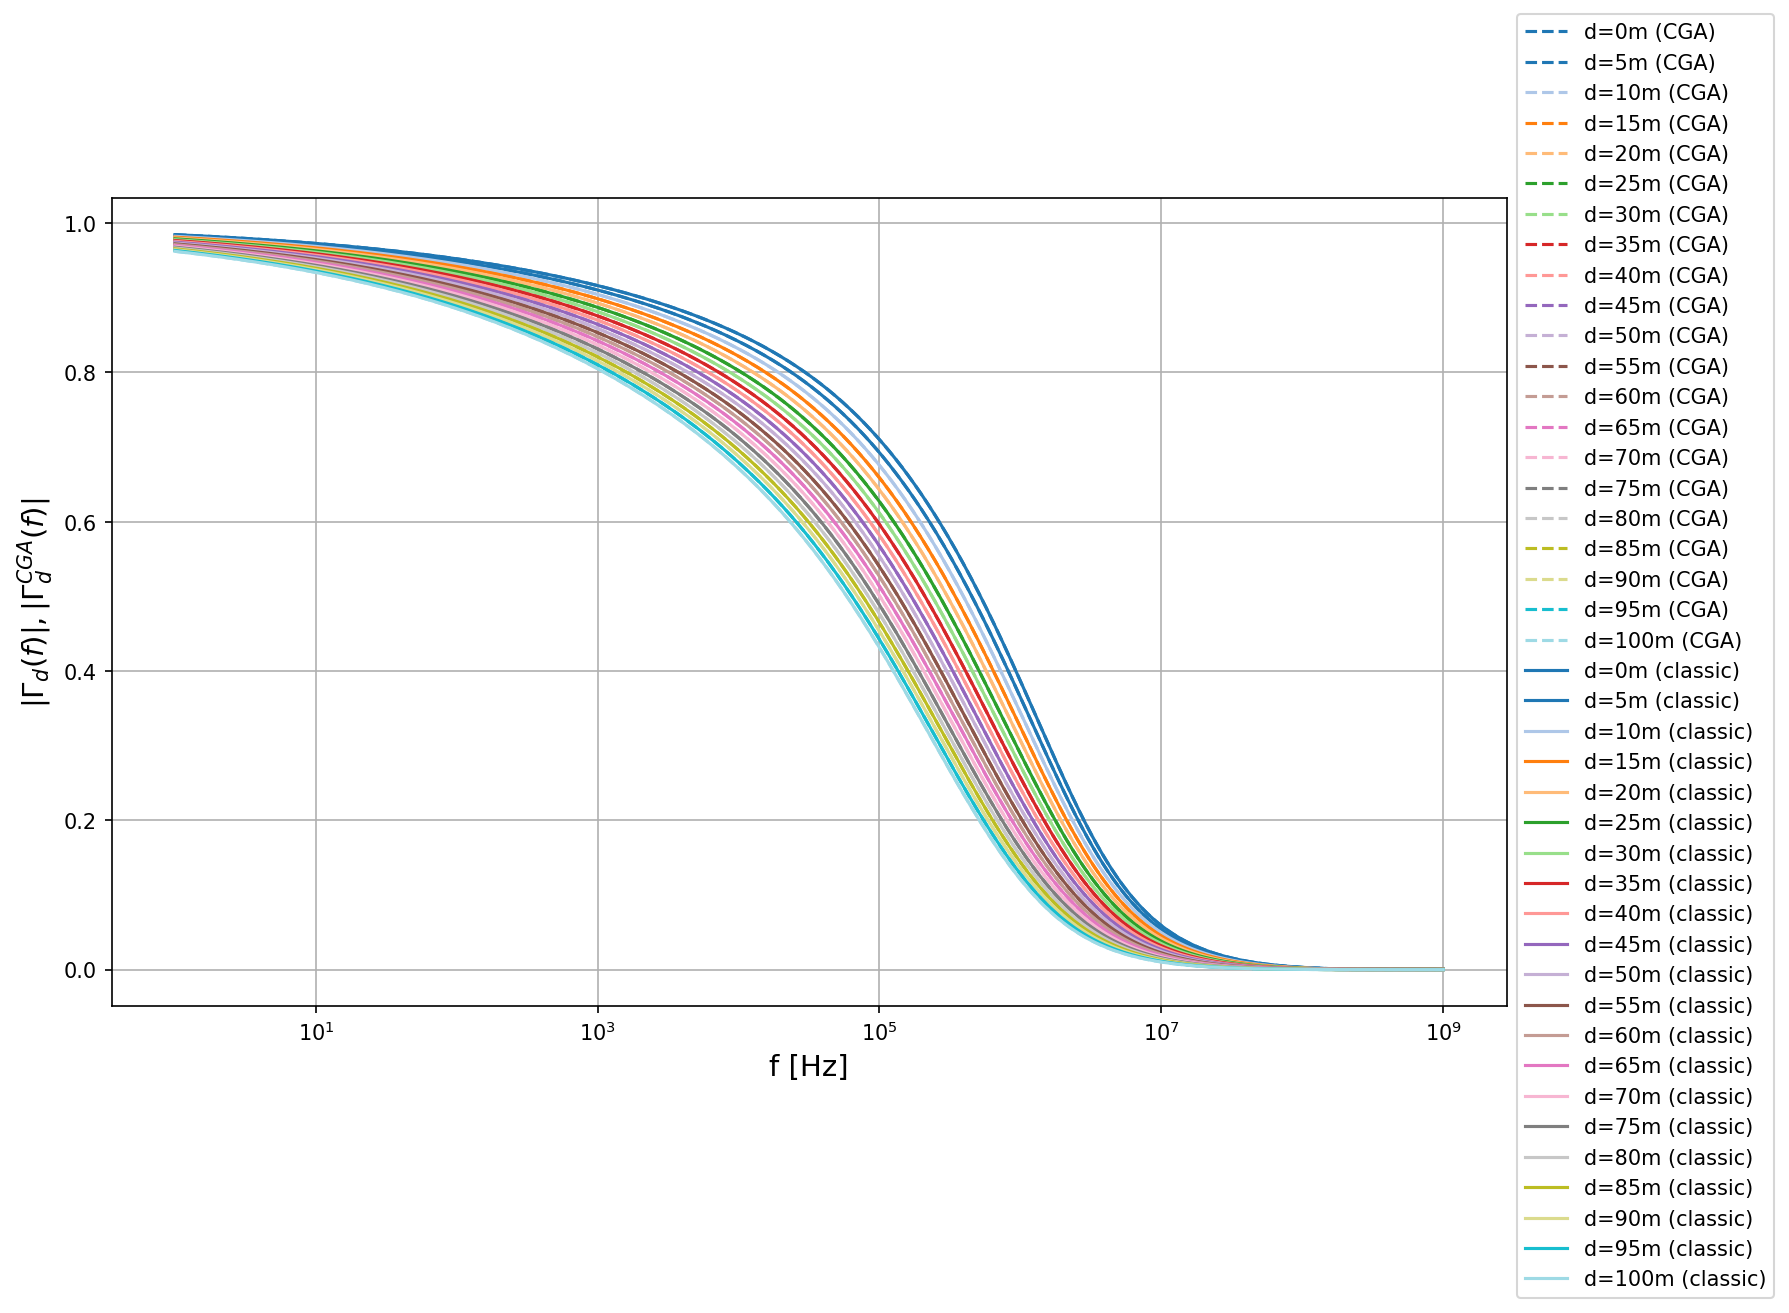

In [20]:
from matplotlib.cm import get_cmap

# initialize step size and distances 
steps = 5 
distances = np.arange(0, l + steps, steps)

# define frequencies
f = np.logspace(0, 9, 1000)  

# colormap
cmap = get_cmap("tab20")
colors = [cmap(i / len(distances)) for i in range(len(distances))]

values_dict_cga = {}
reflections_dict_normal = {}

# calculation for CGA method
log_time("CGA-Reflexionsberechnungen gestartet")
for i, d in enumerate(distances):
    log_time(f"CGA: Berechnung für Abstand d={d}")
    reflection = gamma_cga(d, f)
    projected_values = [downprojection(i) for i in reflection]  
    values_dict_cga[d] = np.abs(np.array(projected_values))

log_time("CGA-Reflexionsberechnungen abgeschlossen")

# calculations for normal method
log_time("Normale Reflexionsberechnungen gestartet")
for d in distances:
    log_time(f"Normal: Berechnung für Abstand d={d}")
    reflections_dict_normal[d] = gamma_normal(d, f)  

log_time("Normale Reflexionsberechnungen abgeschlossen")

# superpoistion plot
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)

# CGA
for i, (d, values) in enumerate(values_dict_cga.items()):
    ax.plot(f, np.abs(values), label=f"d={d}m (CGA)", linestyle="--", color=colors[i])

# classic
for i, (d, reflections) in enumerate(reflections_dict_normal.items()):
    ax.plot(f, np.abs(reflections), label=f"d={d}m (classic)", color=colors[i])


ax.set_xlabel('f [Hz]', fontsize=14)
ax.set_ylabel('$|\Gamma_d(f)|,|\Gamma^{CGA}_d(f)|$', fontsize=14)
ax.set_xscale("log")  
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.0, 1.24))
ax.grid(True)

plt.show()


In [21]:
import numpy as np

absolute_errors = {}
relative_errors = {}

for d in distances:
    # use data from above
    cga_values = values_dict_cga.get(d, [])
    normal_values = reflections_dict_normal.get(d, [])
    

    if len(cga_values) != len(normal_values):
        raise ValueError(f"Mismatch in array lengths for distance {d}.")
    
    cga_values = np.array(np.abs(cga_values))
    normal_values = np.array(np.abs(normal_values))
    
    # absolute errors
    absolute_errors[d] = np.sum(abs(cga_values- normal_values))

    # realtive errors
    with np.errstate(divide='ignore', invalid='ignore'):
        relative_error = np.abs(cga_values - normal_values) / np.abs(normal_values)
        relative_errors[d] = np.sum(relative_error)

print(absolute_errors)
print(relative_errors)

{0: 1.971810431947163e-11, 5: 1.9182104255693888e-11, 10: 1.8737534256390437e-11, 15: 1.8230160978884025e-11, 20: 1.7894978630427633e-11, 25: 1.7550022036755958e-11, 30: 1.717249514246108e-11, 35: 1.6821001406000513e-11, 40: 1.6563731994063274e-11, 45: 1.6315431644597922e-11, 50: 1.6061896495993266e-11, 55: 1.579324972395598e-11, 60: 1.55628634436987e-11, 65: 1.535827544920385e-11, 70: 1.516022929344855e-11, 75: 1.4979708418778534e-11, 80: 1.4796811969057175e-11, 85: 1.463145516271175e-11, 90: 1.4498437542355804e-11, 95: 1.4404506033734209e-11, 100: 1.4342954060363568e-11}
{0: 1.4864508640831425e-09, 5: 1.4865438531809118e-09, 10: 1.485660089251856e-09, 15: 1.4851023756892912e-09, 20: 1.485116396584266e-09, 25: 1.4840424549746385e-09, 30: 1.4843953559826031e-09, 35: 1.4853327973331136e-09, 40: 1.482892755099591e-09, 45: 1.4739506448820216e-09, 50: 1.4583226025916811e-09, 55: 1.4572368526771312e-09, 60: 1.4559379824503531e-09, 65: 1.459505240922124e-09, 70: 1.4550329302627966e-09, 75: 1

superposition plot

/var/folders/nm/73z81_050wz0lqfm_3mplt8h0000gn/T/ipykernel_122/1685811703.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20")


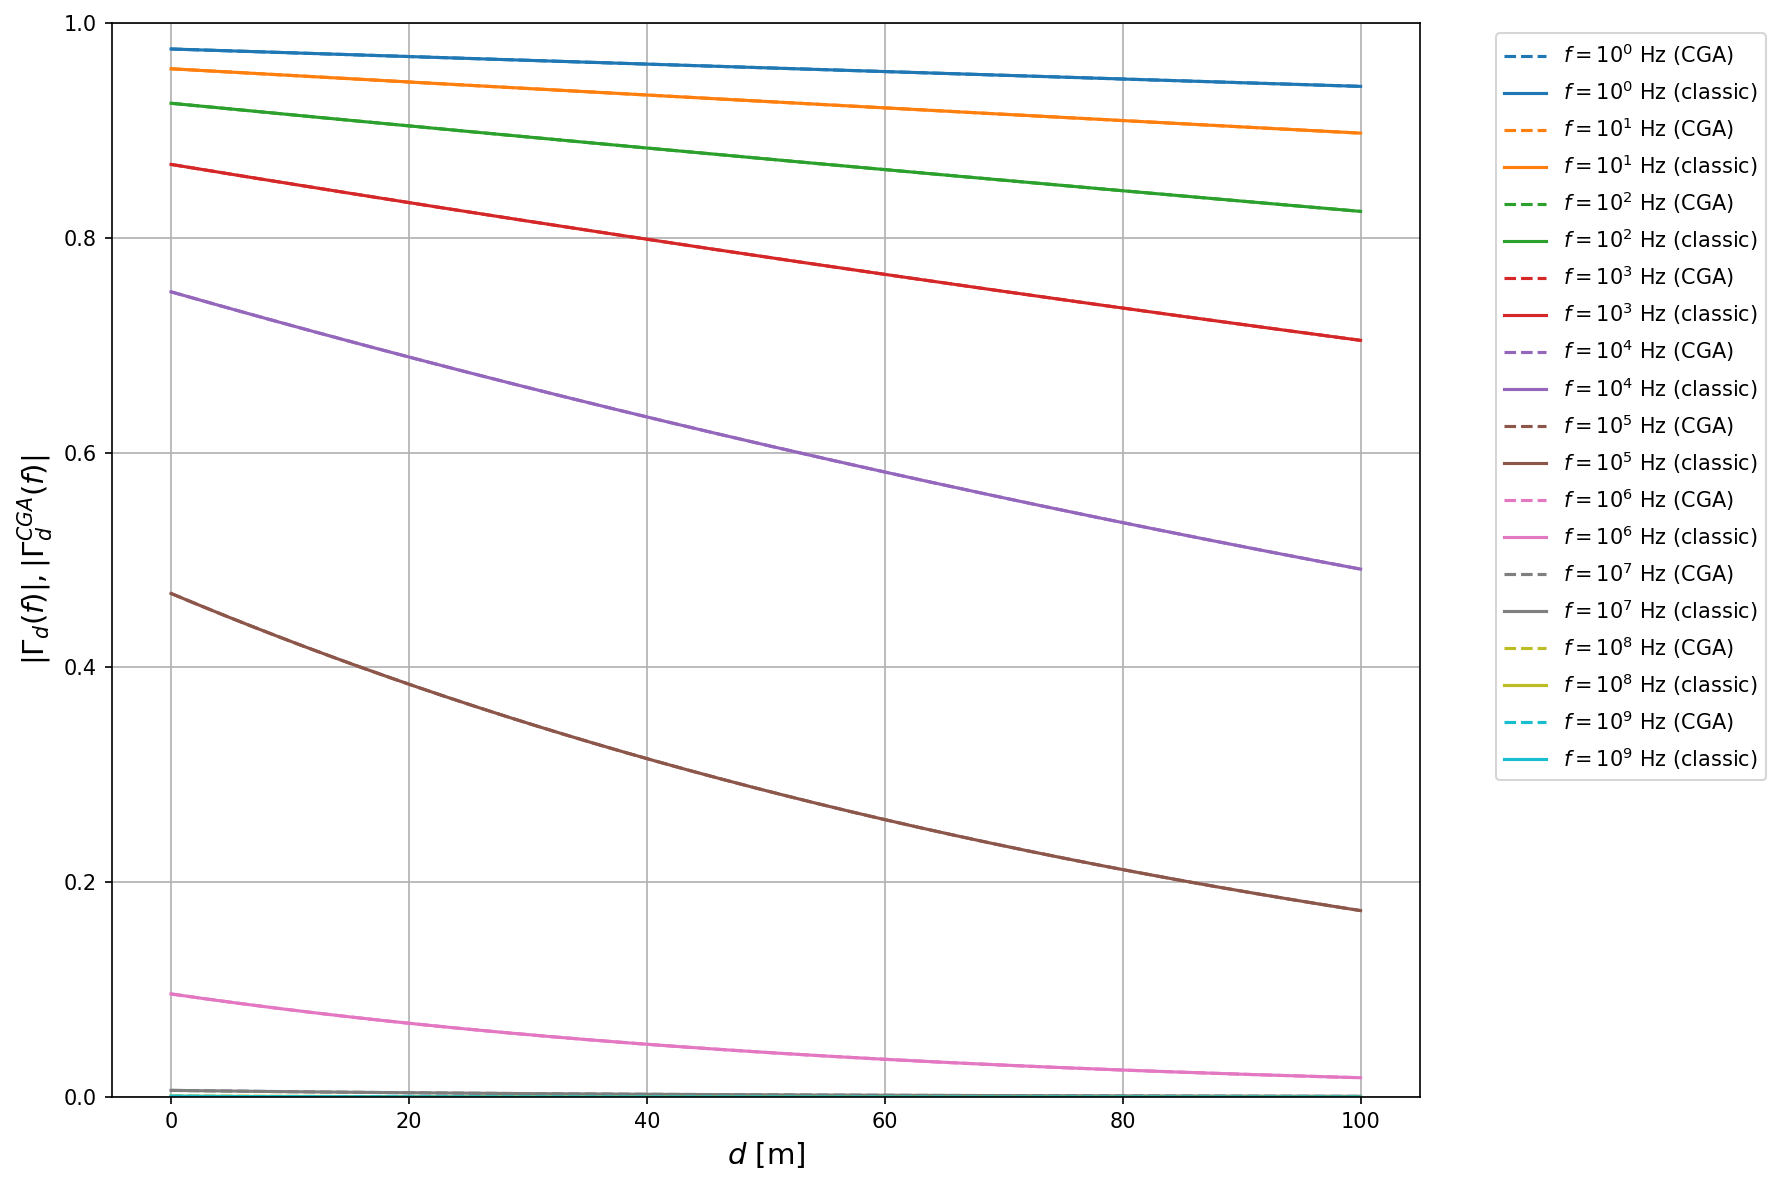

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap



# initalize frequencies
frequencies = [10**i for i in range(10)]  
angular_frequencies = [2 * np.pi * f for f in frequencies] 

# distances
d = np.linspace(0, 100, 10000)


fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# color map
cmap = get_cmap("tab20")
colors = [cmap(i / len(frequencies)) for i in range(len(frequencies))]

# calculations for the plot
for i, w in enumerate(angular_frequencies):
    # CGA
    reflections_cga = gamma_cga(d, w)
    reflections_cga_projected = [np.abs(downprojection(gamma)) for gamma in reflections_cga]
    ax.plot(
        d,
        reflections_cga_projected,
        linestyle="--",
        label=f"$f = 10^{i}$ Hz (CGA)",
        color=colors[i],
    )

    # classical 
    reflections_normal = gamma_normal(d, w)
    ax.plot(
        d,
        np.abs(reflections_normal),
        linestyle="-",
        label=f"$f = 10^{i}$ Hz (classic)",
        color=colors[i],
    )


ax.set_xlabel('$d$ [m]', fontsize=14)
ax.set_ylabel('$|\Gamma_d(f)|, |\Gamma^{CGA}_d(f)| $', fontsize=14)
ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1))  
ax.grid(True)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


calculate frequency errors

In [23]:
# Parameters
frequencies = [10**i for i in range(10)]  
angular_frequencies = [2 * np.pi * f for f in frequencies]
d = np.linspace(0, 100, 10000)

for i, w in enumerate(angular_frequencies):
    # CGA
    reflections_cga = gamma_cga(d, w)
    reflections_cga_projected = [np.abs(downprojection(gamma)) for gamma in reflections_cga]
    # classial
    reflections_normal = gamma_normal(d, w)
    # absolutt error
    absolute_difference= np.sum(np.abs(abs(reflections_normal) - reflections_cga_projected))
    # relative error
    relative_differences = np.sum(
        np.abs((abs(reflections_normal) - reflections_cga_projected) / np.where(reflections_normal == 0, 1e-12, reflections_normal))
    )
    print(absolute_difference,relative_differences)


2.928495224097105e-10 3.055918039014227e-10
2.709292790115114e-10 2.9202909749979583e-10
2.608976368279059e-10 2.9854115813801554e-10
2.336022486559841e-10 2.975918077749255e-10
1.835390728288644e-10 3.006593598890456e-10
8.937350859383741e-11 2.948209968346494e-10
1.8415845237651496e-11 3.971713509145648e-10
8.500052766681476e-12 3.48216491023696e-09
2.9238306051184836e-11 1.2602999405368008e-07
1.469989213275047e-11 2.302118759331698e-07


# Addition of load impedance and load admittance plots

In [24]:
from numpy import e
helperT =lambda a: e**(-1/2^a*einf)
T = lambda r:  helperT(e1*c2s(r))
RotSZ = e**(np.pi/4^e1*e3)
RotZY = e**(np.pi/2^e2*e3)
RotSY = RotSZ*RotZY
S = lambda z: RotSZ * up(e1*c2s(z)) * ~RotSZ
S2 = lambda z: RotSY * up(e1*c2s(z)) * ~RotSY
T_S = lambda r: RotSZ *  T(r) * ~RotSZ #Rotor for adding impedance
T_S2 = lambda r: RotSY * T(r) * ~RotSY #Rotor for adding admittance


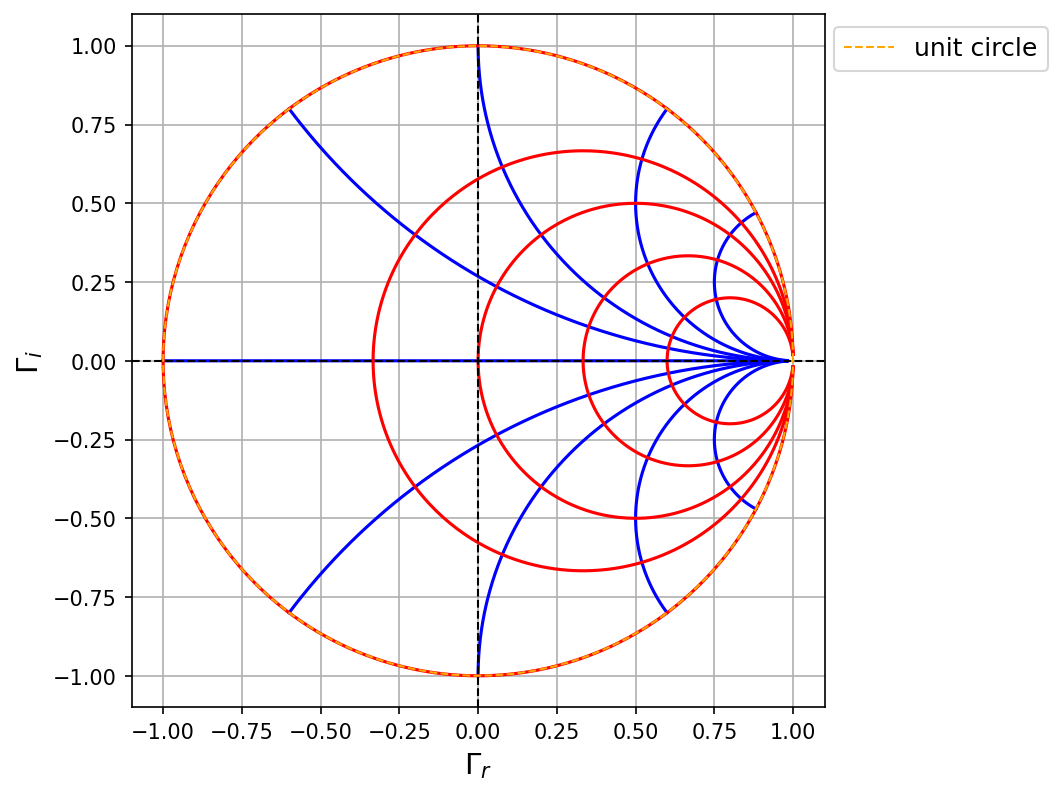

In [106]:
# define addimpednace and addamittance functions
def addimpedance(r: complex, z):
    impedanceplus = lambda r: T_S(r) * S(z) * ~T_S(r)
    return downprojection(impedanceplus(r))

def addadmittance(r: complex, z):
    admitanceplus = lambda r:  T_S2(r) * S2(z) * ~T_S2(r)
    return downprojection(admitanceplus(r))

    


# define data functions

# restistance
def datafunctionres(z):
    r_array = -1*np.linspace(0,100,10000)
    data_helper = []
    for r in r_array: 
        data_helper.append(addimpedance(r,z))
    data = np.array(data_helper)
    return data

# reactance
def datafunctionrea(z):
    r_array = -2j*np.linspace(0,100,10000)
    data_helper = []
    for r in r_array: 
        data_helper.append(addimpedance(r,z))
    data = np.array(data_helper)
    return data

# conductance
def datafunctionconduc(z):
    r_array = -1*np.linspace(0,100,10000)
    data_helper = []
    for r in r_array: 
        data_helper.append(addadmittance(r,z))
    data = np.array(data_helper)
    return data

# susceptance
def datafunctionsusc(z):
    r_array = -2j*np.linspace(0,100,10000)
    data_helper = []
    for r in r_array: 
        data_helper.append(addadmittance(r,z))
    data = np.array(data_helper)
    return data


# impedance values z-data (for resistance and conductance) and z_data_rea (for reactance and susceptance)
z_data = np.array([100-4j,100-2j,100-1j,100-0.5j,100,100+0.5j,100+1j,100+2j,100+4j])
z_data_rea = np.array([100j,100j+0.5,100j+1,100j+2,100j+4])



# unit circle
theta = np.linspace(0, 2 * np.pi, 100)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# plot
fig_addimpedance = plt.figure(figsize=(6, 6), dpi = 150)
for z in z_data:
    x = np.real(datafunctionres(z))
    y = np.imag(datafunctionres(z))    
    plt.plot(x, y, color='blue', marker="",linestyle="-",linewidth =1.5)  
for z in z_data_rea:
    x = np.real(datafunctionrea(z))
    y = np.imag(datafunctionrea(z))    
    plt.plot(x, y, color='red', marker="",linestyle="-",linewidth =1.5)  
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth=1)  
plt.axhline(0, color='black',linestyle="--", linewidth=1)
plt.axvline(0, color='black',linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')  
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.34, 1))
plt.xlabel("$\Gamma_r$", fontsize=14)
plt.ylabel("$\Gamma_i$", fontsize=14)
plt.grid(True)
plt.show()









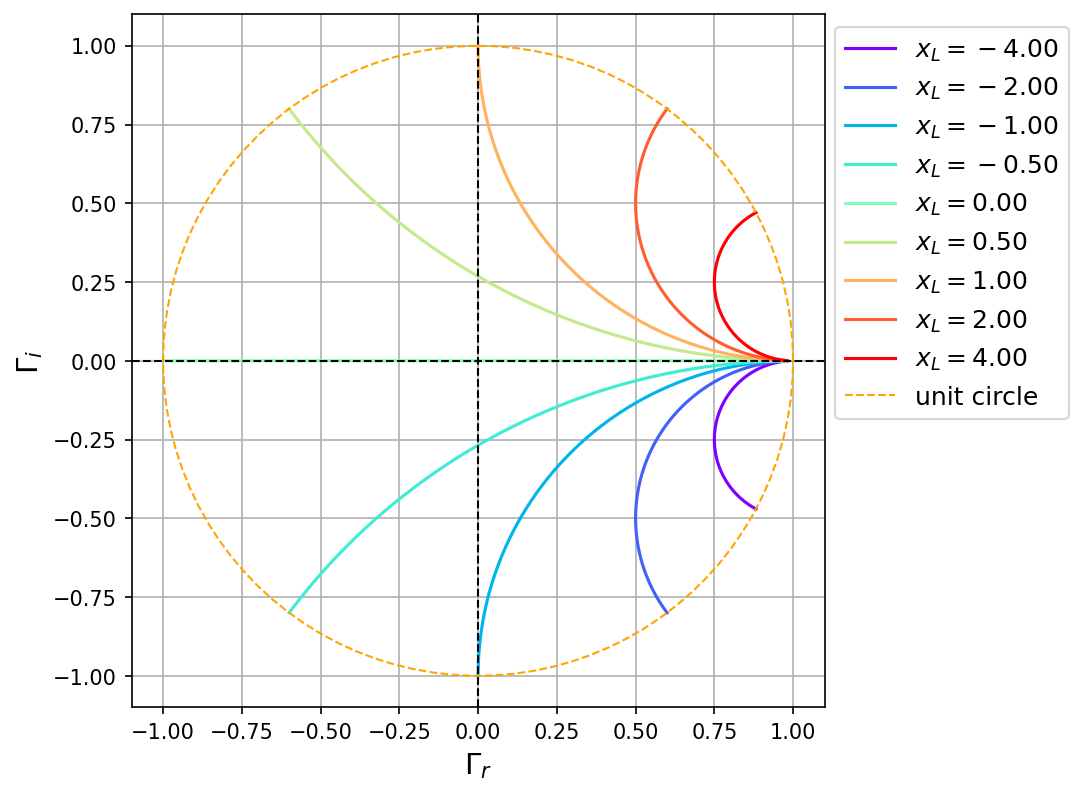

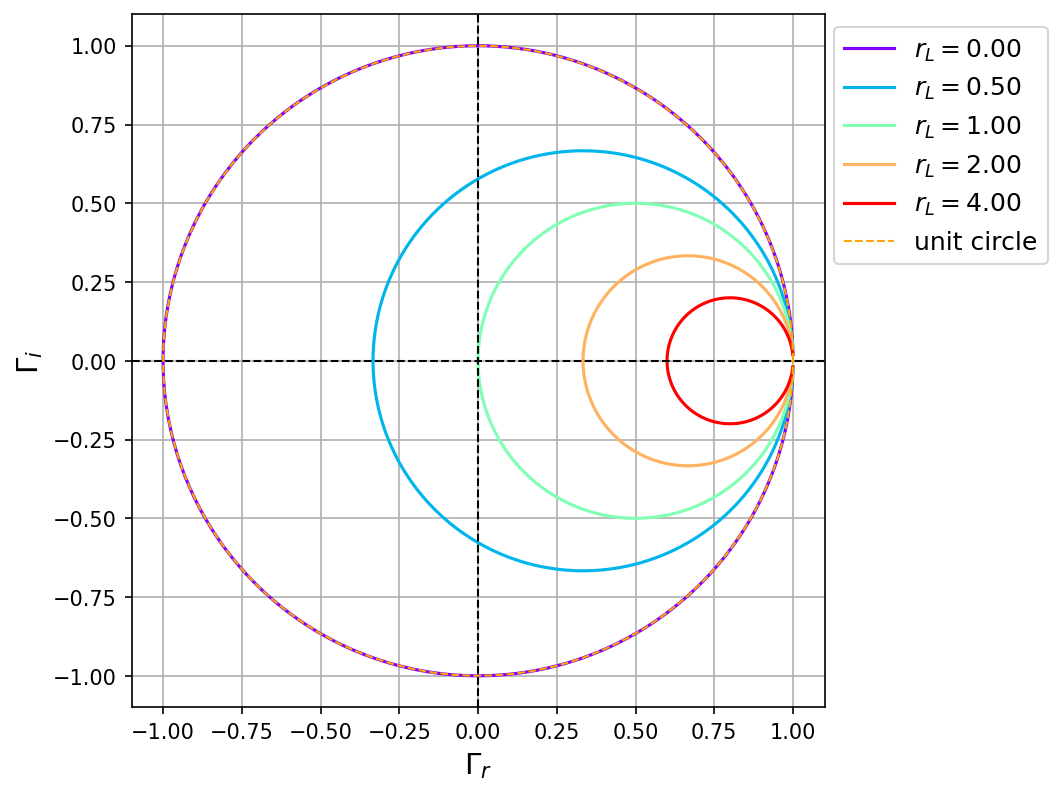

In [ ]:
import matplotlib.cm as cm


# unit circle
theta = np.linspace(0, 2 * np.pi, 100)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# color maps
colors_res = cm.rainbow(np.linspace(0, 1, len(z_data)))  # color map for z_data 
colors_rea = cm.rainbow(np.linspace(0, 1, len(z_data_rea)))  # color map for z_data_rea`



# plot for z_data

fig2 = plt.figure(figsize=(6, 6), dpi=150)

for i, (z, color) in enumerate(zip(z_data, colors_res)):
    x = np.real(datafunctionres(z))
    y = np.imag(datafunctionres(z))
    plt.plot(x, y, color=color, marker="", linestyle="-", linewidth=1.5, label=f"$x_L={np.imag(z):.2f}$")
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth = 1) 

plt.axhline(0, color='black',linestyle="--" ,linewidth=1)
plt.axvline(0, color='black', linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box') 
plt.xlabel("$\Gamma_r$", fontsize=14)
plt.ylabel("$\Gamma_i$", fontsize=14)
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.37, 1)) 
plt.grid(True)

plt.show()

#plot for z_data_rea
fig3 = plt.figure(figsize=(6, 6), dpi=150)
for i, (z, color) in enumerate(zip(z_data_rea, colors_rea)):
    x = np.real(datafunctionrea(z))
    y = np.imag(datafunctionrea(z))
    plt.plot(x, y, color=color, marker="", linestyle="-", linewidth=1.5, label=f"$r_L={np.real(z):.2f}$")
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth = 1) 
plt.axhline(0, color='black',linestyle="--", linewidth=1)
plt.axvline(0, color='black', linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box') 
plt.xlabel("$\Gamma_r$", fontsize=14)
plt.ylabel("$\Gamma_i$", fontsize=14)
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.34, 1))  
plt.grid(True)
plt.show()


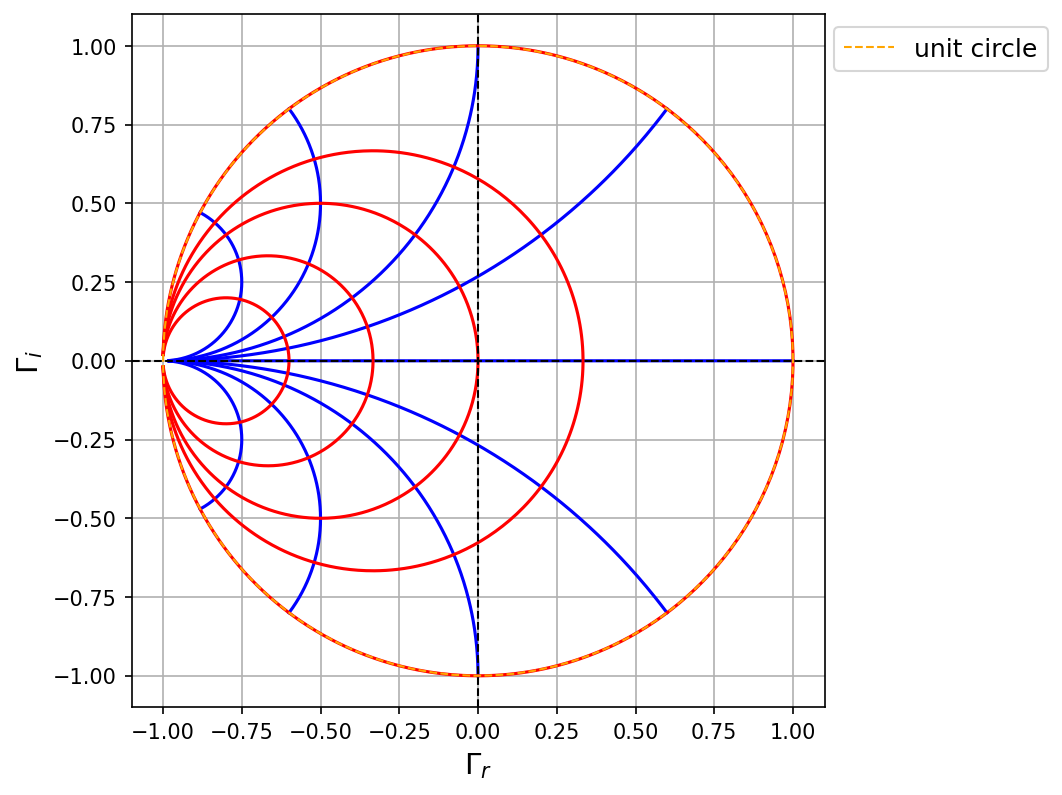

In [108]:
# plot
plt.figure(figsize=(6, 6), dpi = 150) 
for z in z_data:
    x = np.real(datafunctionconduc(z))
    y = np.imag(datafunctionconduc(z))    
    plt.plot(x, y, color='blue', marker="",linestyle="-",linewidth =1.5)  
for z in z_data_rea:
    x = np.real(datafunctionsusc(z))
    y = np.imag(datafunctionsusc(z))    
    plt.plot(x, y, color='red', marker="",linestyle="-",linewidth =1.5)  
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth = 1) 
plt.axhline(0, color='black',linewidth=1,linestyle="--")
plt.axvline(0, color='black',linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box') 
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.34, 1)) 
plt.xlabel("$\Gamma_r$", fontsize=14)
plt.ylabel("$\Gamma_i$", fontsize=14)
plt.grid(True)
plt.show()

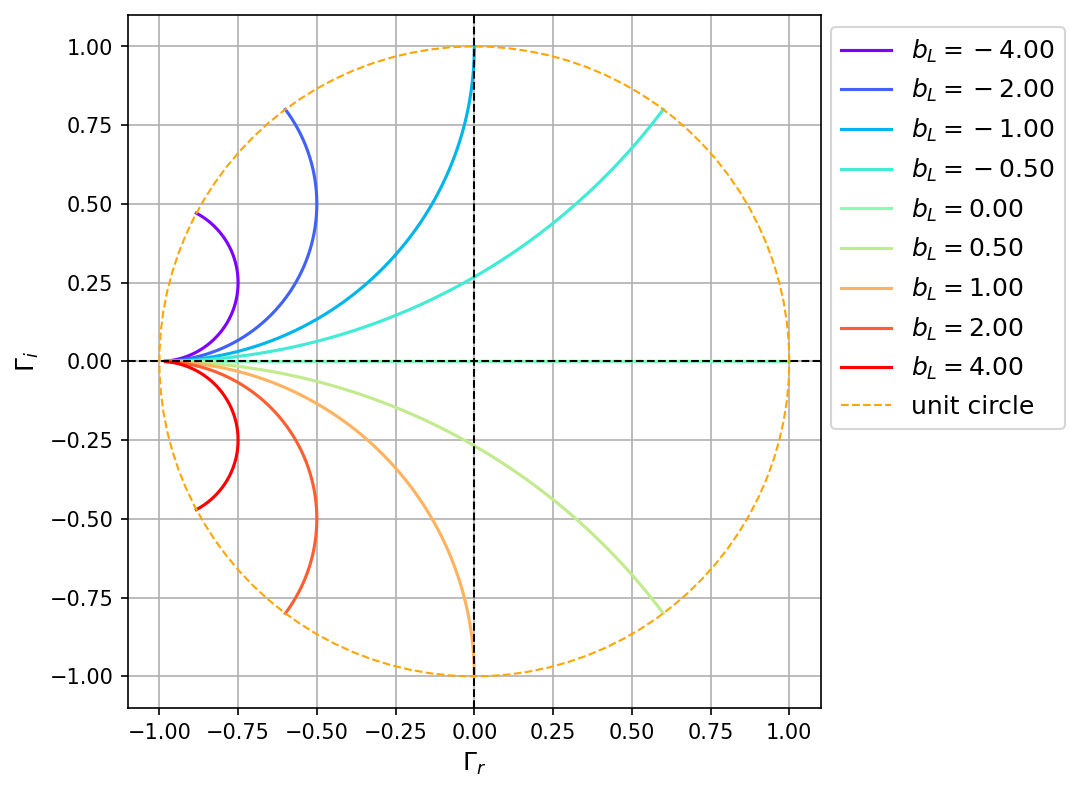

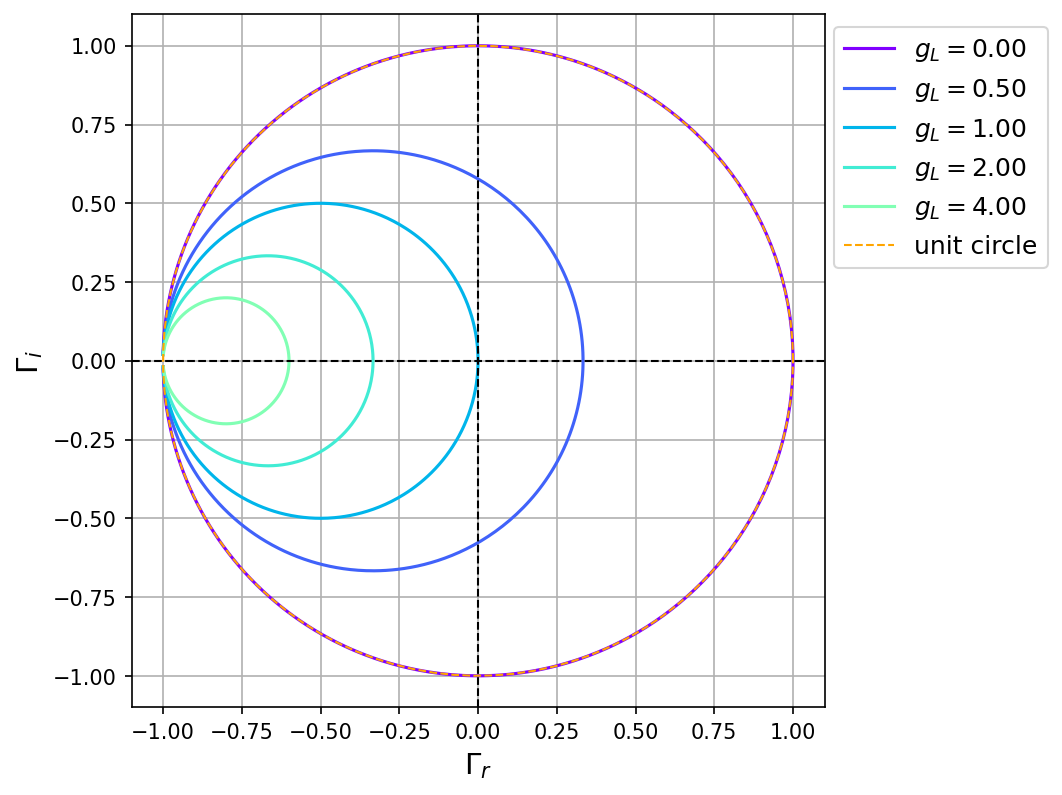

In [ ]:

# color maps
colors_res = cm.rainbow(np.linspace(0, 1, len(z_data)))
colors_rea = cm.rainbow(np.linspace(0, 1, len(z_data_rea))) 




# plots for z_data
plt.figure(figsize=(6, 6), dpi = 150)
for i, (z, color) in enumerate(zip(z_data, colors_res)):
    x = np.real(datafunctionconduc(z))
    y = np.imag(datafunctionconduc(z))    
    plt.plot(x, y, color=color, marker="", linestyle="-", linewidth=1.5, label=f"$b_L={np.imag(z):.2f}$")
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth = 1) 
plt.axhline(0, color='black',linewidth=1,linestyle="--")
plt.axvline(0, color='black',linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')  
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.37, 1))  
plt.xlabel("$\Gamma_r$", fontsize=12)
plt.ylabel("$\Gamma_i$", fontsize=12)
plt.grid(True)
plt.show()





# plots for z_data_rea
plt.figure(figsize=(6, 6), dpi = 150)
for i, (z, color) in enumerate(zip(z_data_rea, colors_res)):
    x = np.real(datafunctionsusc(z))
    y = np.imag(datafunctionsusc(z))    
    plt.plot(x, y, color=color, marker="", linestyle="-", linewidth=1.5, label=f"$g_L={np.real(z):.2f}$")
plt.plot(unit_circle_x, unit_circle_y, label="unit circle", color="orange", linestyle="--", linewidth = 1) 
plt.axhline(0, color='black',linewidth=1,linestyle="--")
plt.axvline(0, color='black',linestyle="--", linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')  
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.34, 1))  
plt.xlabel("$\Gamma_r$", fontsize=14)
plt.ylabel("$\Gamma_i$", fontsize=14)
plt.grid(True)
plt.show()
